In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

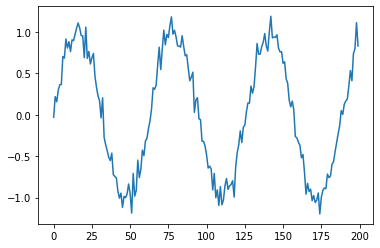

In [10]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1
plt.plot(series);

In [11]:
T = 10
X = []
Y = []

for t in range(len(series)-T):
  X.append(series[t:t+T])
  Y.append(series[t+T])

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = X.shape[0]

In [12]:
i = Input((T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(learning_rate=0.1))

idx = -N//2
history = model.fit(X[:idx], Y[:idx], epochs=80, validation_data=(X[idx:], Y[idx:]));

Epoch 1/80
3/3 [==============================] - 0s 64ms/step - loss: 10.7701 - val_loss: 3.7937
Epoch 2/80
3/3 [==============================] - 0s 15ms/step - loss: 1.7157 - val_loss: 0.3709
Epoch 3/80
3/3 [==============================] - 0s 14ms/step - loss: 0.8229 - val_loss: 1.0805
Epoch 4/80
3/3 [==============================] - 0s 25ms/step - loss: 2.1040 - val_loss: 1.5941
Epoch 5/80
3/3 [==============================] - 0s 15ms/step - loss: 1.9194 - val_loss: 0.9122
Epoch 6/80
3/3 [==============================] - 0s 23ms/step - loss: 0.6963 - val_loss: 0.1973
Epoch 7/80
3/3 [==============================] - 0s 19ms/step - loss: 0.1108 - val_loss: 0.1493
Epoch 8/80
3/3 [==============================] - 0s 14ms/step - loss: 0.3208 - val_loss: 0.3755
Epoch 9/80
3/3 [==============================] - 0s 16ms/step - loss: 0.6076 - val_loss: 0.3483
Epoch 10/80
3/3 [==============================] - 0s 17ms/step - loss: 0.4208 - val_loss: 0.1234
Epoch 11/80
3/3 [===========

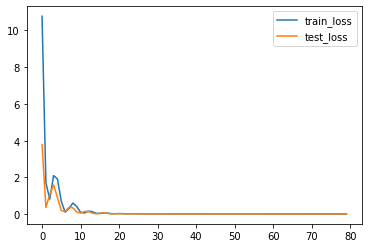

In [13]:
plt.plot(history.history['loss'], label='train_loss');
plt.plot(history.history['val_loss'], label='test_loss');
plt.legend();

In [6]:
# one step predictions
validation_target = Y[idx:]
validation_predictions = []

for t in X[idx:]:
  prediction = model.predict(t.reshape(1,T))
  validation_predictions.append(prediction[0,0])

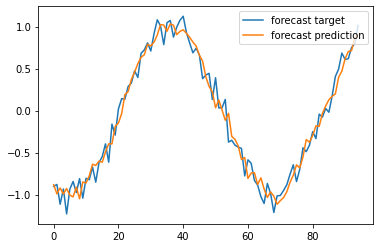

In [7]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend();

In [14]:
# future forecast predictions
validation_target = Y[idx:]
validation_predictions = []

x = X[idx]
for t in X[idx:]:
  prediction = model.predict(x.reshape(1,T))
  validation_predictions.append(prediction[0][0])
  x[:-1] = x[1:]
  x[-1] = prediction

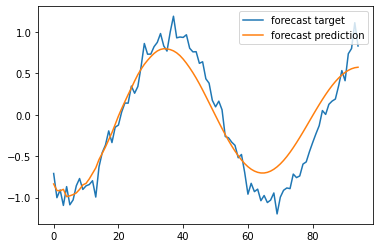

In [15]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend();